# Assignment 2A  - Hill Climbing

In this assignment, you will implement the necessary data structures and subroutines to run hill climbing on traveling salesman problems.

You are given four files

1. This Notebook - You will be running the cells in this file.
1. [sa_utils.py](sa_utils.py). You should not change anything in this file.
1. [tsp_utils.py](tsp_utils.py). You will be writing most of the code in this file.
1. [berlin52.tsp](berlin52.tsp). A TSP file, downloaded from http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

**_TODO_**

Enter your information below.

**Name:** HaoLiu <br>
**CWID:** A20473685

In [1]:
import numpy as np

import pandas as pd

from matplotlib import pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from sa_utils import Node
from sa_utils import hill_climbing

In [2]:
from tsp_utils import City, TSPNode, read_cities, subsample_cities, create_initial_node
from tsp_utils import plot_cities, plot_path, compare_sols

# Reading the file

**_TODO_**: Implement the `read_cities` function in `tsp_utils.py`. This function should read a given TSP file from http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/ Check out the documentation file. Your function should support only the EUC_2D types of files. See `berlin52.tsp` as an example.

`read_cities` should accept a string (filename) and return a dictionary of the City objects, where the key is the City name and the objects are City objects with the correct coordinates.

In [3]:
# Run. It should show the dictionary.
all_cities = read_cities('berlin52.tsp')
TSPNode._cities = all_cities
all_cities

{'1': City: 1 (565.00 575.00),
 '2': City: 2 (25.00 185.00),
 '3': City: 3 (345.00 750.00),
 '4': City: 4 (945.00 685.00),
 '5': City: 5 (845.00 655.00),
 '6': City: 6 (880.00 660.00),
 '7': City: 7 (25.00 230.00),
 '8': City: 8 (525.00 1000.00),
 '9': City: 9 (580.00 1175.00),
 '10': City: 10 (650.00 1130.00),
 '11': City: 11 (1605.00 620.00),
 '12': City: 12 (1220.00 580.00),
 '13': City: 13 (1465.00 200.00),
 '14': City: 14 (1530.00 5.00),
 '15': City: 15 (845.00 680.00),
 '16': City: 16 (725.00 370.00),
 '17': City: 17 (145.00 665.00),
 '18': City: 18 (415.00 635.00),
 '19': City: 19 (510.00 875.00),
 '20': City: 20 (560.00 365.00),
 '21': City: 21 (300.00 465.00),
 '22': City: 22 (520.00 585.00),
 '23': City: 23 (480.00 415.00),
 '24': City: 24 (835.00 625.00),
 '25': City: 25 (975.00 580.00),
 '26': City: 26 (1215.00 245.00),
 '27': City: 27 (1320.00 315.00),
 '28': City: 28 (1250.00 400.00),
 '29': City: 29 (660.00 180.00),
 '30': City: 30 (410.00 250.00),
 '31': City: 31 (420.0

# Subsample Cities

**_TODO_**: Complete the implementation of the `subsample_cities` function in `tsp_utils.py`. The arguments are

* `cities`: the dictionary of the cities
* `number_of_cities`: the number of cities in the subsample
* `random_seed`: the random seed used to create the subsample

It should return a new dictionary of cities.

In [4]:
# Run

subsample_size = 10
subsample_seed = 2

cities = subsample_cities(all_cities, number_of_cities=subsample_size, random_seed=subsample_seed)

cities

{'15': City: 15 (845.00 680.00),
 '26': City: 26 (1215.00 245.00),
 '40': City: 40 (760.00 650.00),
 '46': City: 46 (830.00 485.00),
 '16': City: 16 (725.00 370.00),
 '45': City: 45 (555.00 815.00),
 '48': City: 48 (830.00 610.00),
 '4': City: 4 (945.00 685.00),
 '14': City: 14 (1530.00 5.00),
 '6': City: 6 (880.00 660.00)}

# Implement TSPNode

**_TODO_**: Complete the implementation of the `TSPNode` class. You need to implement

* `expand` This should create all possible children of this node, where a child is a swap of two neighbor cities. A state is an ordered list of city names to visit. Remember that the last city travels back to the start city and hence they are also neighbors.
* `value` This is the negative of the cost of the state. The cost of the state is the sum of the distances between the neighor cities. The distance between two neighbors is the Eucledian distance (square root of the sum of the squares of the differences).

In [5]:
# Run
tsp_node = TSPNode(sorted(list(cities.keys())))
tsp_node

TSPNode: 14-15-16-26-4-40-45-46-48-6

In [6]:
# Run

children_nodes = tsp_node.expand()
len(children_nodes)

10

In [7]:
# Run

children_nodes

[TSPNode: 15-14-16-26-4-40-45-46-48-6,
 TSPNode: 14-16-15-26-4-40-45-46-48-6,
 TSPNode: 14-15-26-16-4-40-45-46-48-6,
 TSPNode: 14-15-16-4-26-40-45-46-48-6,
 TSPNode: 14-15-16-26-40-4-45-46-48-6,
 TSPNode: 14-15-16-26-4-45-40-46-48-6,
 TSPNode: 14-15-16-26-4-40-46-45-48-6,
 TSPNode: 14-15-16-26-4-40-45-48-46-6,
 TSPNode: 14-15-16-26-4-40-45-46-6-48,
 TSPNode: 6-15-16-26-4-40-45-46-48-14]

In [8]:
tsp_node.value()

-4315.526779689034

# Create a random start state

In [9]:
# Run
initial_seed = 5

initial_node = create_initial_node(cities, random_seed=initial_seed)

initial_node

TSPNode: 4-48-26-46-40-16-15-6-45-14

In [10]:
# Run
initial_node.value()

-4480.278437200555

# Implement Plot Functions

**_TODO_**: Implement

* `
* ` Given an matplotlib axes, a dictionary of cities, and a state, it should plot the cities in the state. The cities should be plotted at their coordinates.

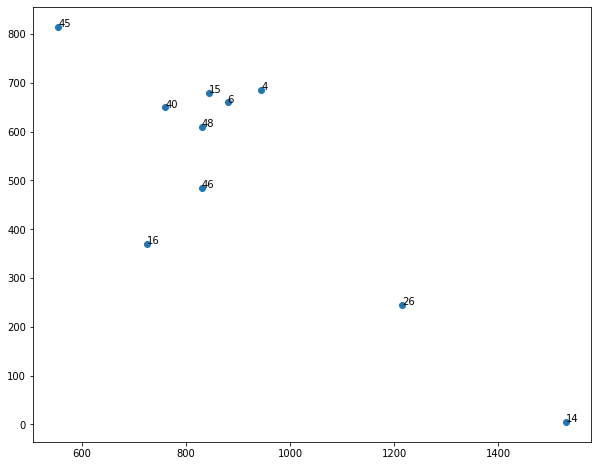

In [11]:
# Run
fig, ax = plt.subplots()
plot_cities(ax, all_cities, initial_node.state)

**_TODO_**: Implement

* `plot_path` Given an matplotlib axes, a dictionary of cities, and a state, it should plot the edges between the cities.

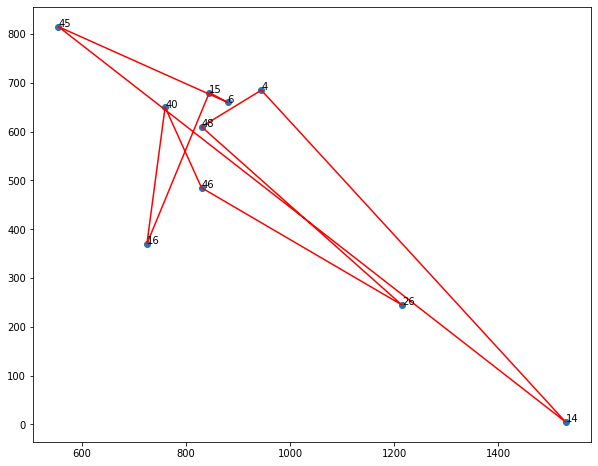

In [12]:
# Run
fig, ax = plt.subplots()
plot_cities(ax, all_cities, initial_node.state)
plot_path(ax, cities, initial_node.state)

# Run Hill Climbing

In [13]:
# Run
print("Initial Node")
print(type(initial_node))
hc_sol_node = hill_climbing(initial_node)
hc_sol_node

Initial Node
<class 'tsp_utils.TSPNode'>


TSPNode: 4-26-14-16-46-40-15-6-48-45

In [14]:
hc_sol_node.value()

-3086.348120526929

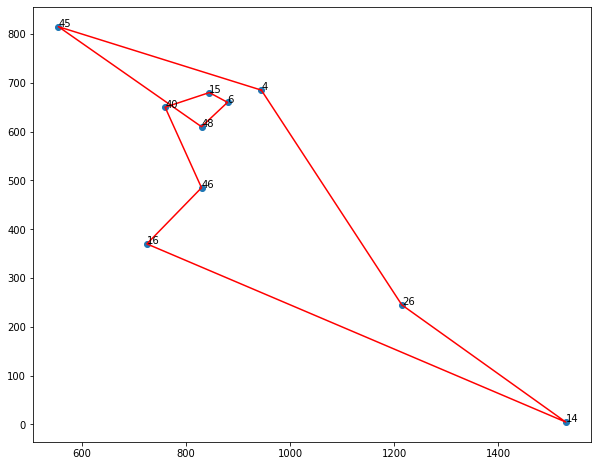

In [15]:
# Plot the solution
fig, ax = plt.subplots()
plot_cities(ax, all_cities, hc_sol_node.state)
plot_path(ax, all_cities, hc_sol_node.state)

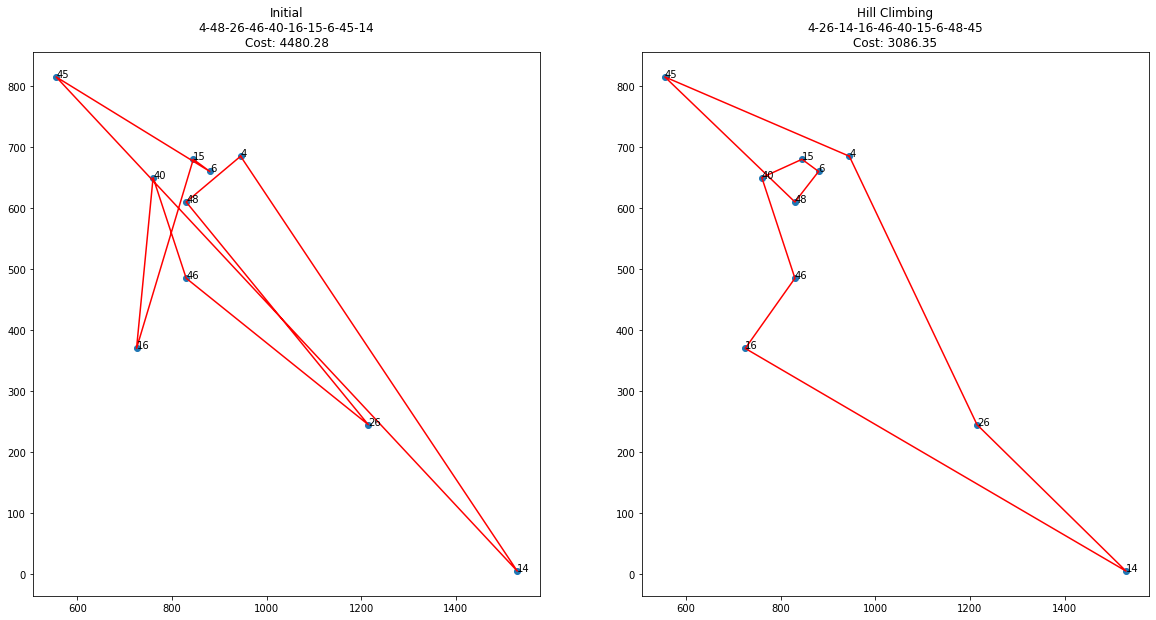

In [16]:
# Run
compare_sols((("Initial", initial_node), ("Hill Climbing", hc_sol_node)), all_cities)

# Simulations 1 - Subsample of 10

1. Create multiple subsamples of cities, of size 10 each
2. Create multiple initializations for each.
3. Run HC for each.
4. Present the initial and the HC results as a table.

Use 

* subsample_size = 10
* subsample_seeds of `[0, 1, 2, 3, 4]`
* initial_seeds = `[11, 12, 13, 14, int(last_three_digits_of_your_CWID)]`





In [17]:
# TODO - Write code and run the simulation

def run_simulations(subsample_size, subsample_seeds, initial_seeds):
    """
    Run the simulations for the given parameters.
    """
    initial_states = {}
    hc_states = {}
    for subsample_seed in subsample_seeds:
        cities = subsample_cities(all_cities, number_of_cities=subsample_size, random_seed=subsample_seed)
        initial_states[subsample_seed] = {}
        hc_states[subsample_seed] = {}
        for initial_seed in initial_seeds:
            initial_node = create_initial_node(cities, random_seed=initial_seed)
            initial_states[subsample_seed][initial_seed] = initial_node
            hc_states[subsample_seed][initial_seed] = hill_climbing(initial_node)
    return initial_states, hc_states


In [18]:
CWID='A20473685'
subsample_size = 10
subsample_seeds = range(0, 5)
initial_seeds = [11, 12, 13, 14, 15, int(CWID[6:])]

# TODO - Complete the code. It finally should display a table.
initial_states, hc_states = run_simulations(subsample_size, subsample_seeds, initial_seeds)
import pandas as pd
df = pd.DataFrame(columns=['Subsample Seed', 'Initial Seed', 'Initial Value', 'HC Value'])
df['Subsample Seed'] = [ j for j in subsample_seeds for i in initial_seeds]
df['Initial Seed'] = [ i for j in subsample_seeds for i in initial_seeds]
df['Initial Value'] = [initial_states[j][i].value() for j in subsample_seeds for i in initial_seeds]
df['HC Value'] = [hc_states[j][i].value() for j in subsample_seeds for i in initial_seeds]
display(df)

,Subsample Seed,Initial Seed,Initial Value,HC Value
0,0,11,-6910.854964,-4845.283431
1,0,12,-4805.420205,-4578.810278
2,0,13,-6281.931261,-6230.336304
3,0,14,-6547.397559,-4943.598730
4,0,15,-6567.276372,-3994.034490
5,0,685,-4089.327327,-3939.512675
6,1,11,-3897.908590,-2195.289900
7,1,12,-3851.562313,-3140.493238
8,1,13,-3343.303102,-2746.034130
9,1,14,-2431.764939,-2159.997566


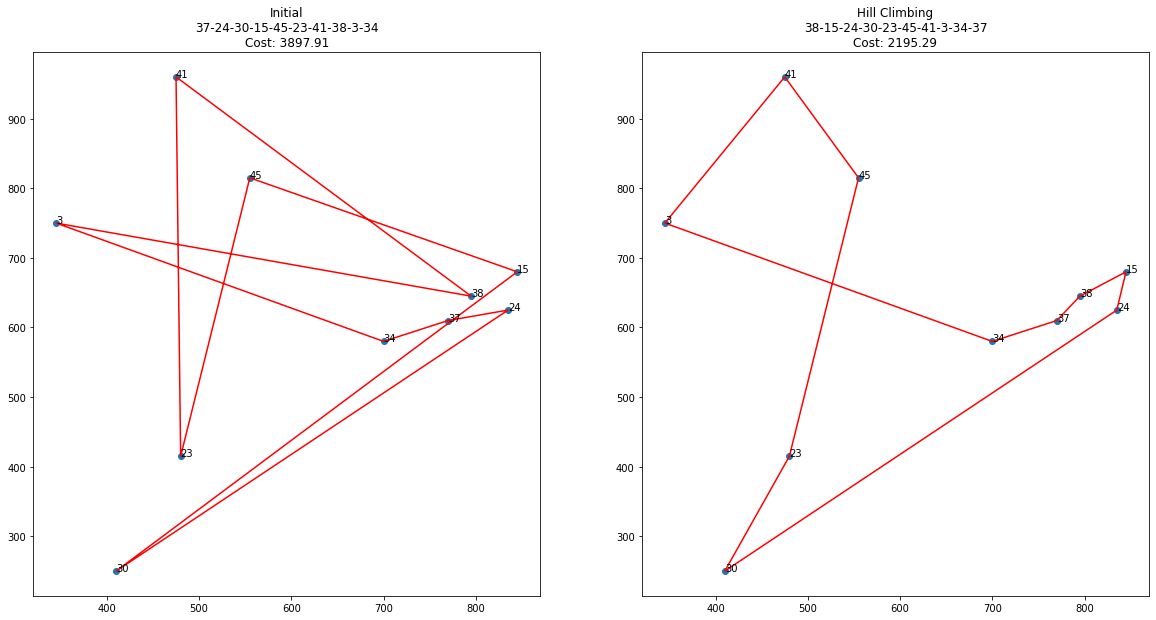

In [19]:

# Pick subsample seed and initial seed, and visualize the initialization and the HC.

compare_sols((("Initial", initial_states[1][11]), ("Hill Climbing", hc_states[1][11])), all_cities)

# Simulations 2

Repeat the above simulation for

* subsample of 20
* subsample of 30
* subsample of 40

Finally, repeat it for the full set of cities (i.e., no subsampling, only random initialization).

,Subsample Seed,Initial Seed,Initial Value,HC Value
0,0,11,-14528.512545,-9409.188607
1,0,12,-12492.176845,-9553.188395
2,0,13,-12938.237671,-11515.194157
3,0,14,-12529.839281,-10628.089376
4,0,15,-11961.551958,-10324.493947
5,0,685,-12764.576346,-7868.568848
6,1,11,-8315.996528,-5971.753474
7,1,12,-8106.832988,-5710.267338
8,1,13,-7919.323807,-6222.817913
9,1,14,-7841.527843,-5757.361661


,Subsample Seed,Initial Seed,Initial Value,HC Value
0,0,11,-18452.333046,-14751.060989
1,0,12,-16392.240025,-13710.665979
2,0,13,-19073.027869,-13446.357383
3,0,14,-18543.235765,-14528.437203
4,0,15,-18072.423051,-12982.142435
5,0,685,-19757.068889,-12084.093737
6,1,11,-14617.254235,-11752.905682
7,1,12,-12924.087636,-11395.282251
8,1,13,-13329.522781,-11252.846115
9,1,14,-13921.360320,-10533.700060


,Subsample Seed,Initial Seed,Initial Value,HC Value
0,0,11,-22422.827965,-18173.154615
1,0,12,-24004.194769,-18844.451113
2,0,13,-24314.444478,-19406.699556
3,0,14,-23950.875799,-18255.824281
4,0,15,-25058.430067,-18536.135701
5,0,685,-22871.791725,-19439.177595
6,1,11,-21039.012888,-15656.884408
7,1,12,-22582.888615,-17234.947213
8,1,13,-20314.188732,-15903.115885
9,1,14,-21356.947180,-16087.632942


,Subsample Seed,Initial Seed,Initial Value,HC Value
0,0,11,-31341.440592,-24386.679891
1,0,12,-28501.327303,-22336.651571
2,0,13,-29191.886193,-22960.907423
3,0,14,-33497.821978,-24220.819770
4,0,15,-28864.122676,-23114.078512
5,0,685,-29767.168904,-23499.217536
6,1,11,-27733.692461,-22213.206925
7,1,12,-33503.439105,-26638.790908
8,1,13,-33253.988918,-25542.650339
9,1,14,-28666.006138,-24951.430933


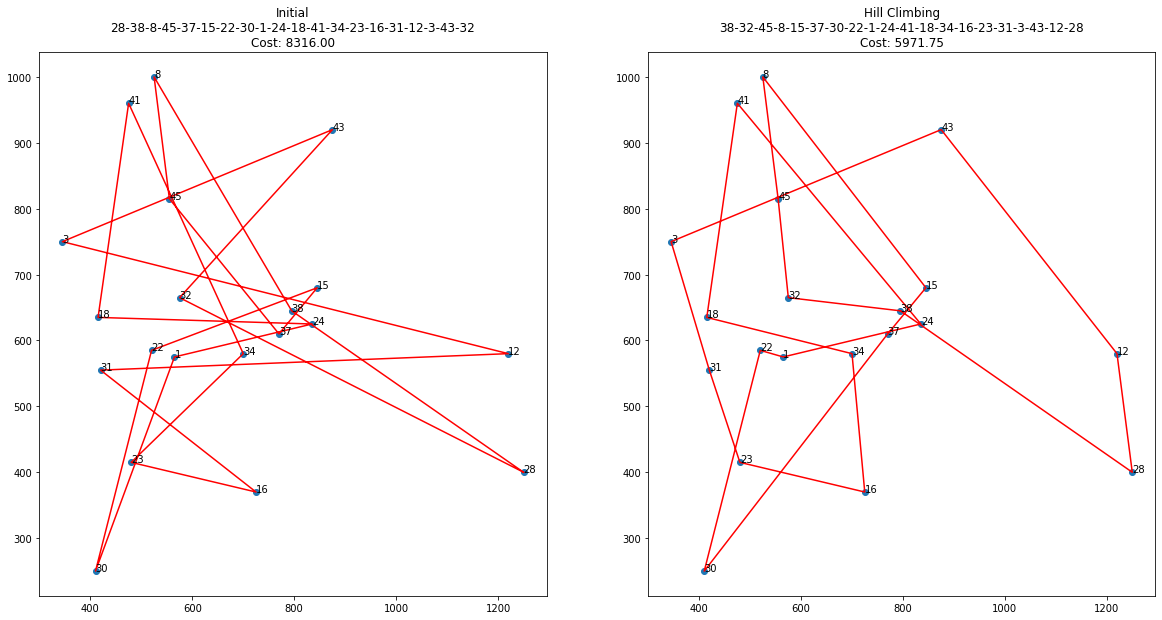

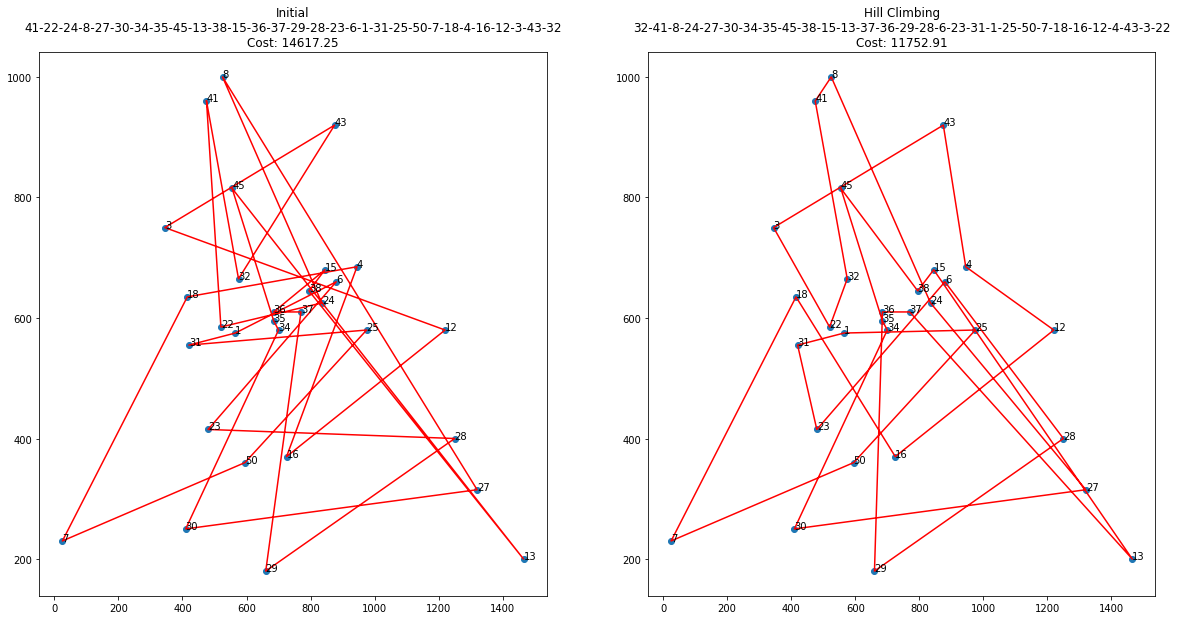

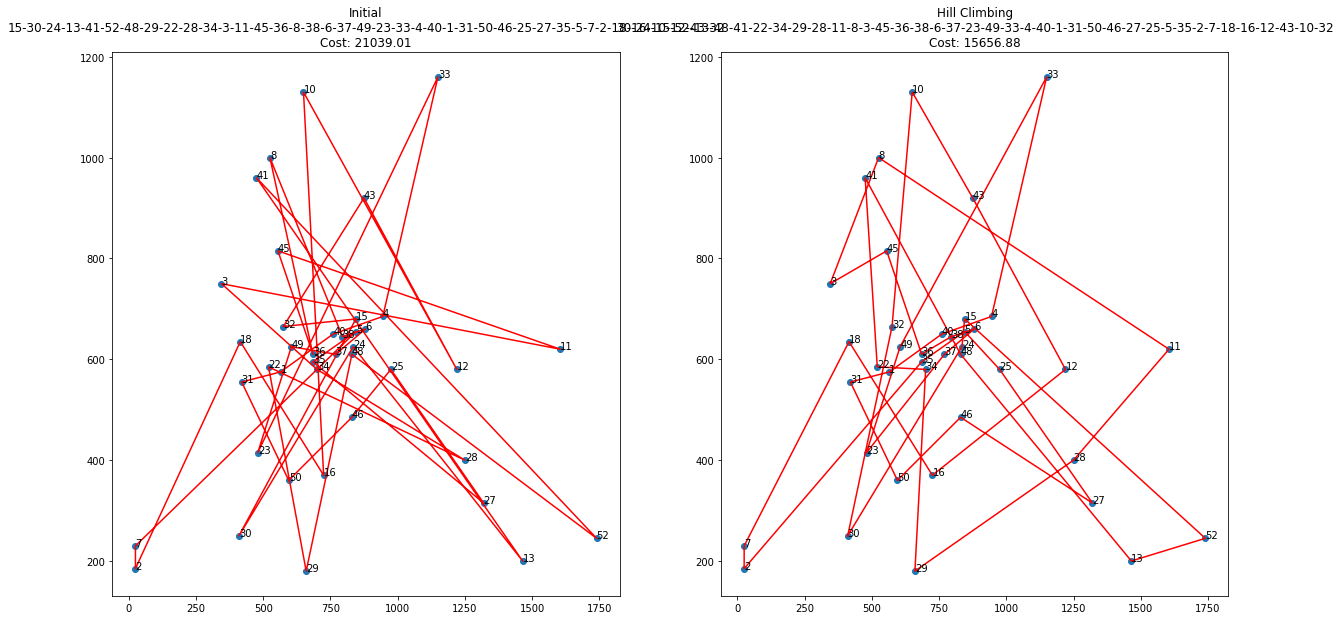

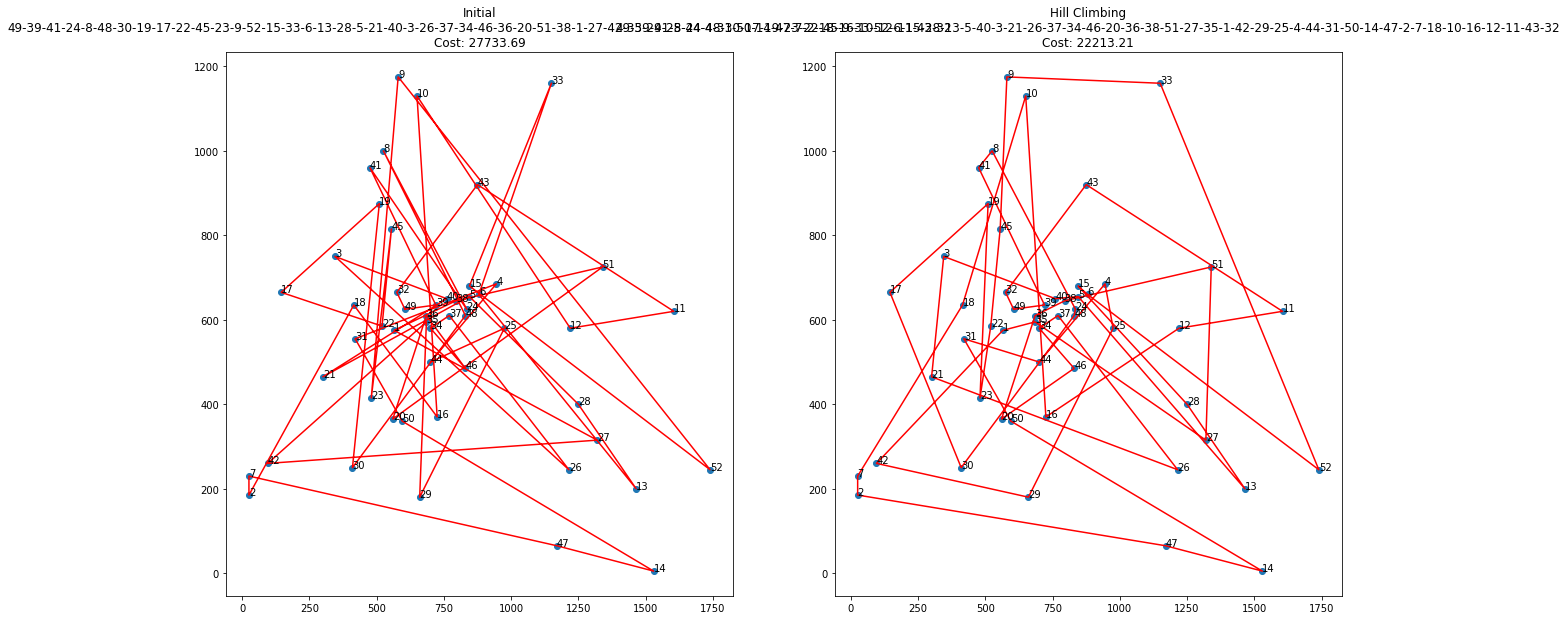

In [20]:
subsample_size_list=[20, 30, 40, len(all_cities)]
subsample_seeds = range(0, 5)
initial_seeds = [11, 12, 13, 14, 15, int(CWID[6:])]
for subsample_size in subsample_size_list:
    initial_states, hc_states = run_simulations(subsample_size, subsample_seeds, initial_seeds)
    df = pd.DataFrame(columns=['Subsample Seed', 'Initial Seed', 'Initial Value', 'HC Value'])
    df['Subsample Seed'] = [ j for j in subsample_seeds for i in initial_seeds]
    df['Initial Seed'] = [ i for j in subsample_seeds for i in initial_seeds]
    df['Initial Value'] = [initial_states[j][i].value() for j in subsample_seeds for i in initial_seeds]
    df['HC Value'] = [hc_states[j][i].value() for j in subsample_seeds for i in initial_seeds]
    display(df)
    compare_sols((("Initial", initial_states[1][11]), ("Hill Climbing", hc_states[1][11])), all_cities)


# Optional (for fun only - no extra credit)

Given a Hill Climbing solution, trace the path to the initial state (using the `path()` function) and visualize the differences between each successsor state.

Here is a simple one. I'm sure you can come up with fancier ones.

In [21]:
def plot_path_diff(cities, state, path):
    """
    Plot the path differences.
    """

    path=[i for i in path]
    xtmp=[]
    ytmp=[]
    for i in range(len(path) - 1):

        fig, ax = plt.subplots()
        state1 = path[i].state
        state2 = path[i + 1].state
        state=state1
        x = [cities[i].x for i in state]
        y = [cities[i].y for i in state]

        ax.scatter(x, y)
        for j in range(len(state)):
            ax.annotate(state[j], (x[j], y[j]))
        x+=x[0:1]
        y+=y[0:1]
        ax.plot(x, y, color='black')
        if i==0:
            xtmp=x
            ytmp=y
        else:
            xtmp_2=[xtmp[j] if x[j]!=xtmp[j] else 0 for j in range(len(x))]
            ytmp_2=[ytmp[j] if y[j]!=ytmp[j] else 0 for j in range(len(y))]
            xtmp=x
            ytmp=y
            xtmp_2=[xtmp_2[j] for j in range(len(xtmp_2)) if xtmp_2[j]!=0]
            ytmp_2=[ytmp_2[j] for j in range(len(ytmp_2)) if ytmp_2[j]!=0]
            #print(xtmp_2,ytmp_2)
            ax.plot(xtmp_2, ytmp_2, color='red')








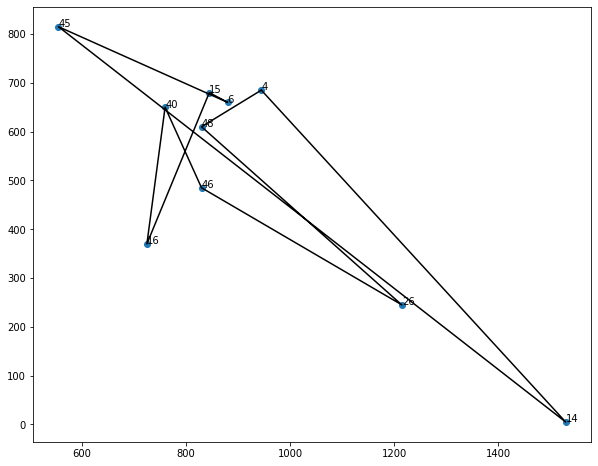

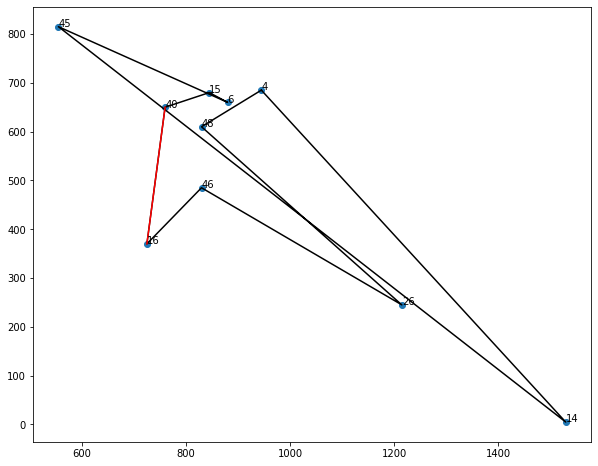

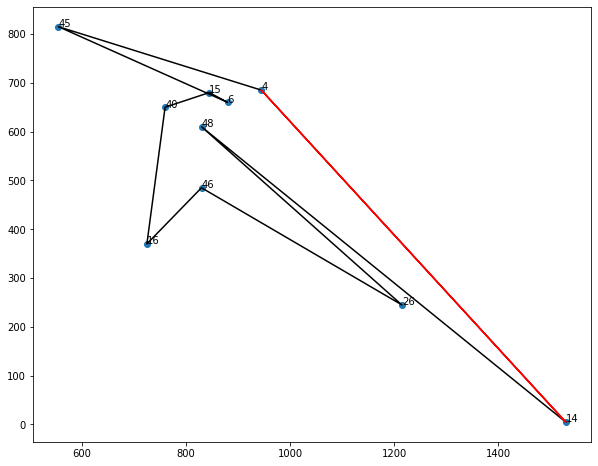

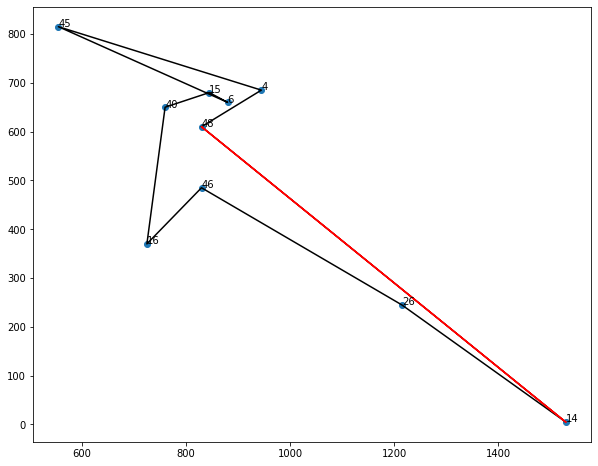

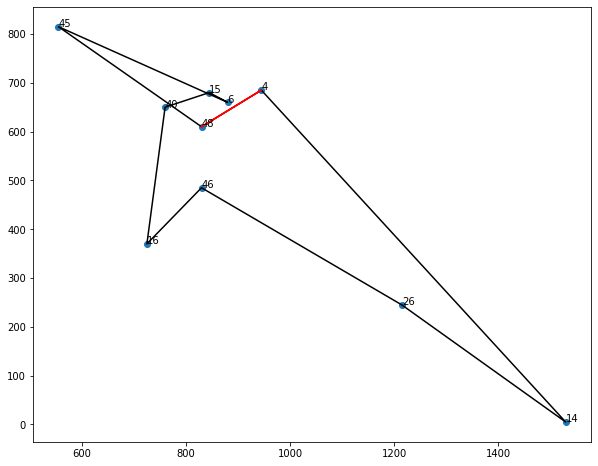

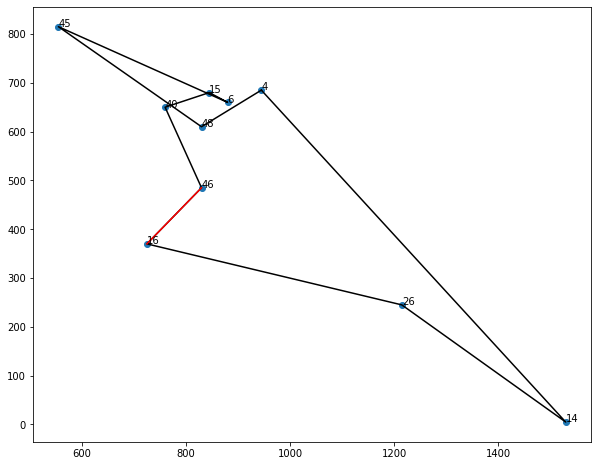

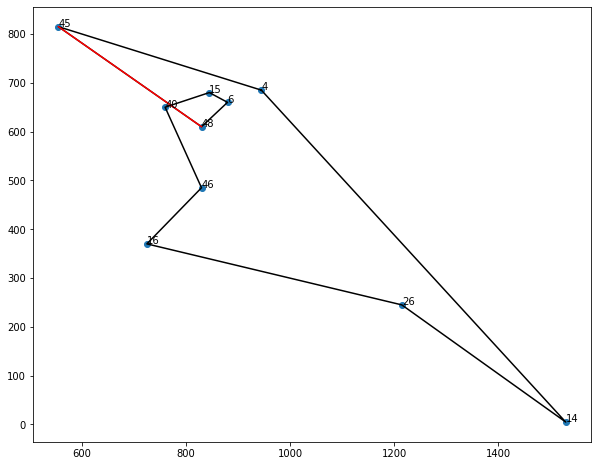

In [22]:

plot_path_diff(all_cities, hc_sol_node.state, hc_sol_node.path())